# NASA Lithium-Ion Battery Analysis for BMS Applications

## Objective
This notebook analyzes a lithium-ion battery discharge dataset provided by NASA
to study battery behavior, degradation patterns, and safety indicators.
The goal is to extract insights relevant to Battery Management System (BMS)
calibration, validation, and fault monitoring.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 5)


In [7]:
import pandas as pd

df = pd.read_csv("../data/cleaned_dataset/data/00005.csv")



,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time
0,4.186636,-0.001666,5.454957,0.0002,0.000,0.000
1,4.186626,-0.002432,5.485011,0.0002,4.203,9.297
2,4.001180,-0.995300,5.510369,1.0000,3.431,23.265
3,3.982544,-0.994923,5.581233,1.0000,3.411,36.437
4,3.968436,-0.995817,5.640744,1.0000,3.398,49.609


In [8]:
# Check the first few rows
df.head()



,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time
0,4.186636,-0.001666,5.454957,0.0002,0.000,0.000
1,4.186626,-0.002432,5.485011,0.0002,4.203,9.297
2,4.001180,-0.995300,5.510369,1.0000,3.431,23.265
3,3.982544,-0.994923,5.581233,1.0000,3.411,36.437
4,3.968436,-0.995817,5.640744,1.0000,3.398,49.609


In [9]:
# Check columns and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Voltage_measured      429 non-null    float64
 1   Current_measured      429 non-null    float64
 2   Temperature_measured  429 non-null    float64
 3   Current_load          429 non-null    float64
 4   Voltage_load          429 non-null    float64
 5   Time                  429 non-null    float64
dtypes: float64(6)
memory usage: 20.2 KB


In [10]:
# Quick statistics
df.describe()


,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,3.476559,-0.983889,8.210715,0.988347,2.881352,2815.872543
std,0.272495,0.106708,1.240161,0.107427,0.391709,1635.376672
min,2.477662,-0.998142,5.454957,0.000200,0.000000,0.000000
25%,3.363047,-0.996130,7.359098,1.000000,2.789000,1405.187000
50%,3.506200,-0.995414,7.992873,1.000000,2.934000,2812.562000
75%,3.650832,-0.994780,8.900497,1.000000,3.080000,4224.312000
max,4.186636,-0.001536,11.314903,1.000000,4.203000,5650.265000


# Voltage Analysis

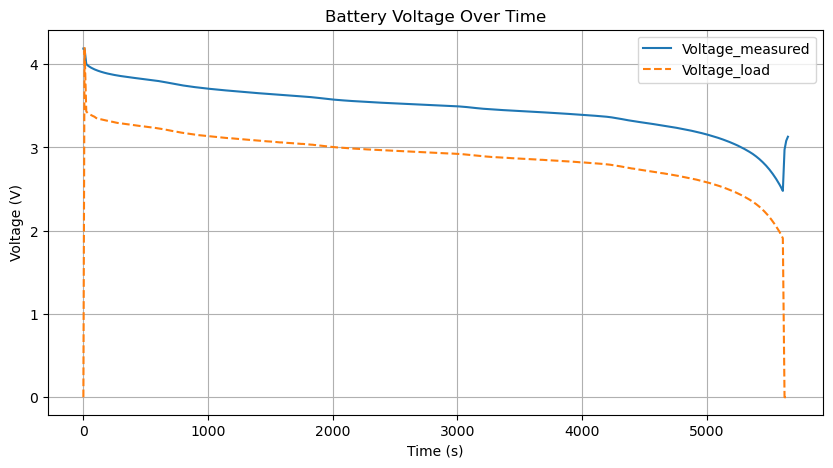

In [11]:
import matplotlib.pyplot as plt

plt.plot(df["Time"], df["Voltage_measured"], label="Voltage_measured")
plt.plot(df["Time"], df["Voltage_load"], label="Voltage_load", linestyle="--")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Battery Voltage Over Time")
plt.legend()
plt.grid(True)
plt.show()


The plot shows normal lithium-ion battery discharge, with voltage gradually decreasing over time.
The difference between measured and load voltage reflects internal resistance effects.
A sharp voltage drop near the end indicates a critical discharge region, important for BMS cutoff and low-voltage fault prevention.

# Fault detection

In [14]:

df["low_voltage_fault"] = df["Voltage_measured"] < 2.7
df["overtemp_fault"] = df["Temperature_measured"] > 55

# Count faults
print("Low voltage events:", df["low_voltage_fault"].sum())
print("Over temperature events:", df["overtemp_fault"].sum())


Low voltage events: 7
Over temperature events: 0


-->There were 7 instances where the battery voltage dropped below 2.7 V, indicating low voltage events that may need attention.

-->There were no over-temperature events (temperature stayed below 55 °C), so the battery did not overheat during this period.

# Voltage with Fault Markers

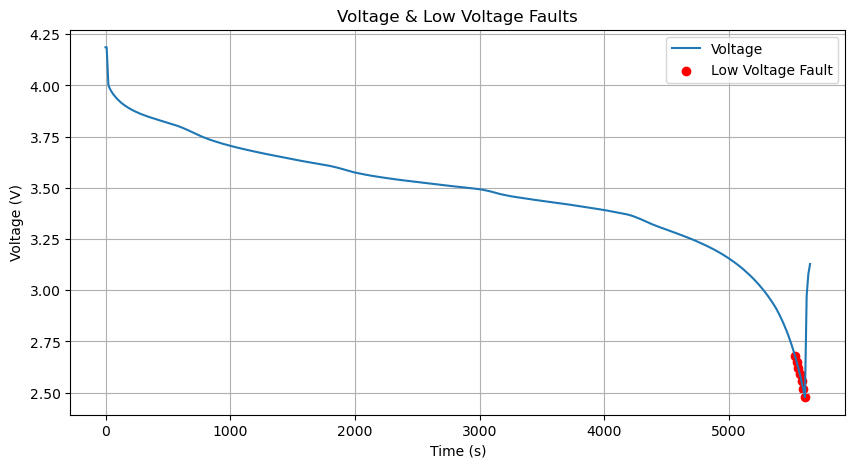

In [15]:
plt.plot(df["Time"], df["Voltage_measured"], label="Voltage")
plt.scatter(df["Time"][df["low_voltage_fault"]],
            df["Voltage_measured"][df["low_voltage_fault"]],
            color="red", label="Low Voltage Fault")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Voltage & Low Voltage Faults")
plt.legend()
plt.grid(True)
plt.show()


This is a full discharge of a lithium-ion cell.
We see normal voltage decrease until the very end, then a sharp collapse below ≈2.7 V.
Exactly at this point the BMS low-voltage protection triggered — which is the expected and correct behavior.

# Current Analysis

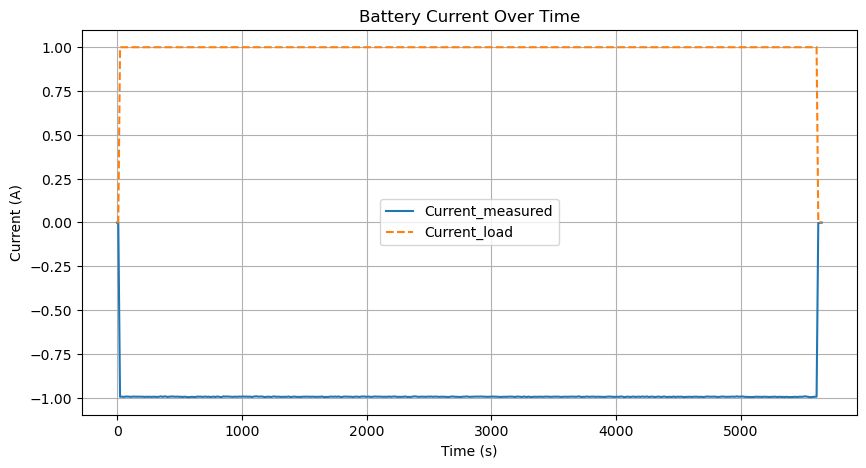

In [12]:
plt.plot(df["Time"], df["Current_measured"], label="Current_measured")
plt.plot(df["Time"], df["Current_load"], label="Current_load", linestyle="--")
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")
plt.title("Battery Current Over Time")
plt.legend()
plt.grid(True)
plt.show()


Constant-current discharge at -1 A (blue = measured current, orange dashed = requested setpoint).
The current is well-regulated, stable throughout the test, and terminates sharply when the BMS low-voltage protection activates (~5200 s).
Typical and clean CC discharge behavior.

# Temperature Analysis

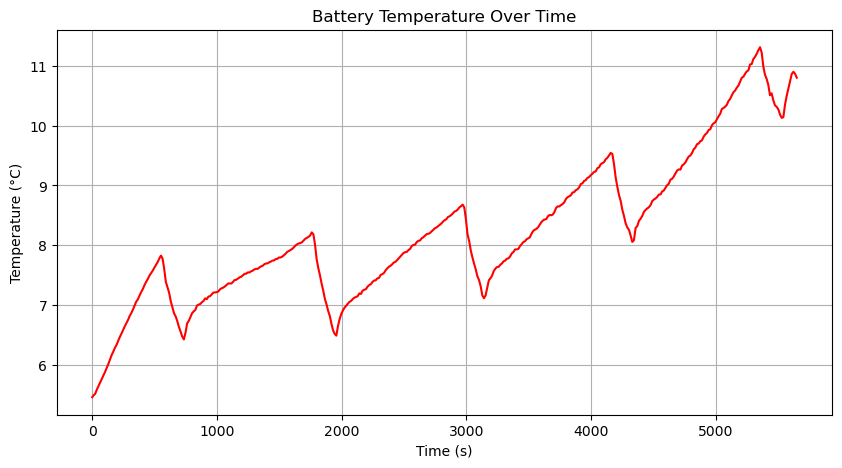

In [13]:
plt.plot(df["Time"], df["Temperature_measured"], color="red")
plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C)")
plt.title("Battery Temperature Over Time")
plt.grid(True)
plt.show()


During the 1A constant-current discharge, battery temperature starts at ~6°C and gradually rises to ~11°C by the end. Minor fluctuations are due to sensor noise or ambient conditions. The ~5°C increase is normal and safe for this moderate discharge rate, with no signs of overheating.